<a href="https://colab.research.google.com/github/hirva2004/House_Price_Prediction/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/Housing.csv"
df=pd.read_csv(path)
df.head(300)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,4200000,2325,3.0,1.0,2.0,no,no,no,no,no,0.0,no,semi-furnished
296,4200000,4600,3.0,2.0,2.0,yes,no,no,no,yes,1.0,no,semi-furnished
297,4200000,3640,3.0,2.0,2.0,yes,no,yes,no,no,0.0,no,unfurnished
298,4200000,5800,3.0,1.0,1.0,yes,no,no,yes,no,2.0,no,semi-furnished


In [ ]:
#data cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          544 non-null    float64
 3   bathrooms         543 non-null    float64
 4   stories           544 non-null    float64
 5   mainroad          543 non-null    object 
 6   guestroom         544 non-null    object 
 7   basement          542 non-null    object 
 8   hotwaterheating   544 non-null    object 
 9   airconditioning   544 non-null    object 
 10  parking           543 non-null    float64
 11  prefarea          543 non-null    object 
 12  furnishingstatus  541 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 55.5+ KB


In [ ]:
#dimension
df.shape

(545, 13)

In [ ]:
#stat
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,544.000000,543.000000,544.000000,543.000000
mean,4.766729e+06,5150.541284,2.963235,1.285451,1.805147,0.688766
std,1.870440e+06,2170.141023,0.737405,0.502310,0.868251,0.859505
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# check the null values
df.isnull().sum()

price               0
area                0
bedrooms            1
bathrooms           2
stories             1
mainroad            2
guestroom           1
basement            3
hotwaterheating     1
airconditioning     1
parking             2
prefarea            2
furnishingstatus    4
dtype: int64

In [ ]:
#to handle the null values we use mean

df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms']).mean()
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms']).mean()
df['stories'] = df['stories'].fillna(df['stories']).mean()
df['parking'] = df['parking'].fillna(df['parking']).mean()

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            1
bathrooms           2
stories             1
mainroad            2
guestroom           1
basement            3
hotwaterheating     1
airconditioning     1
parking             2
prefarea            2
furnishingstatus    4
dtype: int64

In [ ]:
column = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
label = preprocessing.LabelEncoder()



In [ ]:
mapping = { }
for col in column:
  df[col] = label.fit_transform(df[col])
  label_mapping = dict(zip(label.classes_,label.transform(label.classes_)))
  mapping[col] = label_mapping


In [ ]:
df.dtypes

price                 int64
area                  int64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad              int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking             float64
prefarea              int64
furnishingstatus      int64
dtype: object

In [ ]:
# To Change the datatype of some columns from float to int astype(datatype) method is used with column.
df['bedrooms'] = df['bedrooms'].fillna(0).astype(int)
df['bathrooms'] = df['bathrooms'].fillna(0).astype(int)
df['stories'] = df['stories'].fillna(0).astype(int)
df['parking'] = df['parking'].fillna(0).astype(int)





In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


Data Visualization

Text(0.5, 1.0, 'Price VS Area')

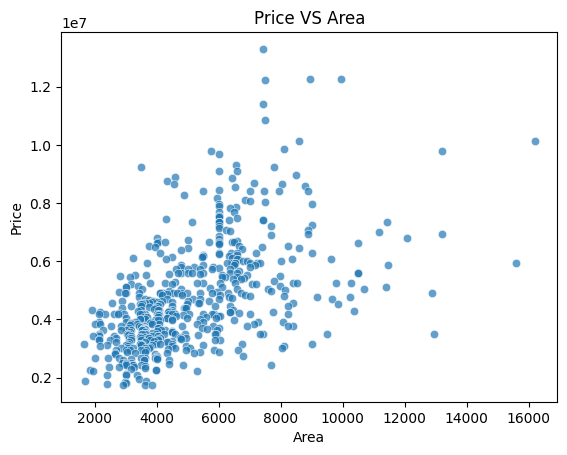

In [ ]:
sns.scatterplot(x=df['area'],y= df['price'],alpha=0.7)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price VS Area")

Text(0.5, 1.0, 'Price VS Bedrooms')

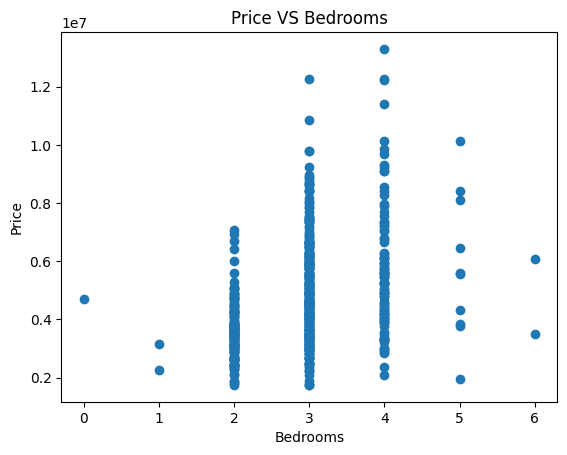

In [ ]:
plt.scatter(df['bedrooms'],df['price'])
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Price VS Bedrooms")

In [ ]:
# Create a function for scatter plot and subplots. it is used to see the scatter plot in 4 subplots.

color = ['r','b','g','y']
marker = ['*','o','x','.']

def graph(feature):
  for i in range(len(feature)):
    plt.subplot(2,2,i+1)
    plt.scatter(df[feature[i]],df['price'], c=color[i] ,s=70, marker=marker[i])

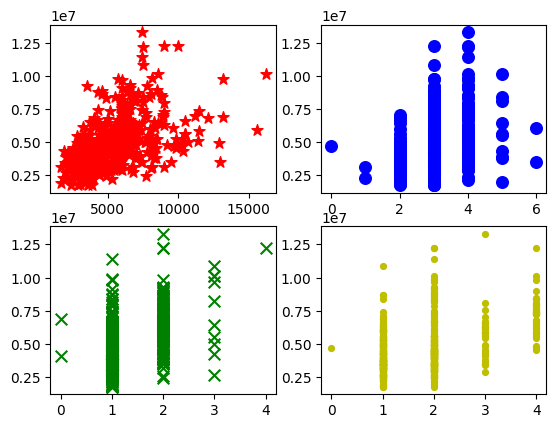

In [ ]:
# use a list of columns and store in the X variable.
# call the funciton graph with

X = ['area','bedrooms','bathrooms','stories']
graph(X)


# plt.subplot(2,2,1)
# plt.scatter(df['area'],df['price'], c='r',s=70, marker='*')
# plt.subplot(2,2,2)
# plt.scatter(df['bedrooms'],df['price'], c='b',s=70, marker='o')
# plt.subplot(2,2,3)
# plt.scatter(df['bathrooms'],df['price'], c='g',s=70, marker='x')
# plt.subplot(2,2,4)
# plt.scatter(df['stories'],df['price'], c='y',s=70, marker='.')

<Axes: title={'center': 'price'}, xlabel='parking'>

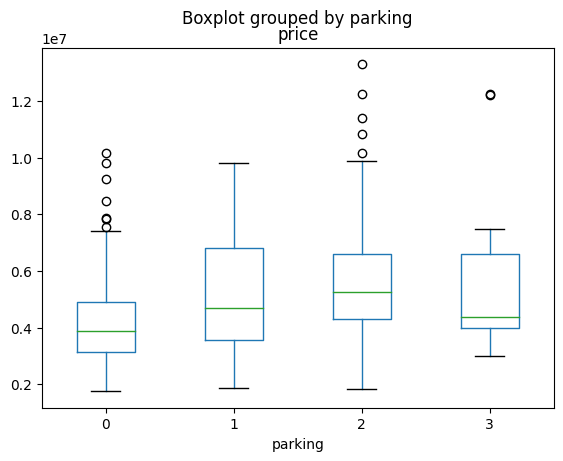

In [ ]:
# Boxplot of parking with respect to price.

df.boxplot(by="parking", column =['price'], grid = False)

Model the data

In [ ]:
X = df.drop('price',axis=1)
y = df['price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [ ]:
print("Training Data: \n",X_train,y_train)
print("\n\n\nTesting Data: \n",X_test,y_test)

Training Data: 
       area  bedrooms  bathrooms  stories mainroad guestroom basement  \
443   4320       3.0        1.0      1.0       no        no       no   
323   5400       3.0        1.0      1.0      yes        no       no   
157   2817       4.0        2.0      2.0       no       yes      yes   
231   4320       3.0        1.0      1.0      yes        no       no   
351   3600       2.0        1.0      1.0      yes        no       no   
..     ...       ...        ...      ...      ...       ...      ...   
369   3600       2.0        1.0      1.0      yes        no       no   
320   4320       3.0        1.0      2.0      yes        no       no   
527   1836       2.0        1.0      1.0       no        no      yes   
125  15600       3.0        1.0      1.0      yes        no       no   
265   2880       3.0        1.0      2.0      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
443              no              no      1.0 